# DNS

In [1]:
import json

# Bước 1: Đọc file dnsmasqlabel.log để lấy danh sách các số chỉ line cần tách
def get_anomaly_lines(label_log_path):
    anomaly_lines = set()
    with open(label_log_path, 'r') as label_file:
        for line in label_file:
            log_entry = json.loads(line.strip())
            anomaly_lines.add(log_entry['line'])
    return anomaly_lines

# Bước 2: Tách các dòng từ dnsmasq.log dựa trên danh sách anomaly_lines
def split_dns_logs(original_log_path, anomaly_log_path, normal_log_path, anomaly_lines):
    with open(original_log_path, 'r') as dns_log, \
         open(anomaly_log_path, 'w') as anomaly_log, \
         open(normal_log_path, 'w') as normal_log:
        
        for i, log_line in enumerate(dns_log, start=1):
            if i in anomaly_lines:
                anomaly_log.write(log_line)
            else:
                normal_log.write(log_line)

# Đường dẫn tới các file
label_log_path = 'dnsmasqlabel.log'
original_log_path = 'dnsmasq.log'
anomaly_log_path = 'dnsanomaly.log'
normal_log_path = 'dnsnormal.log'

# Bước 3: Gọi các hàm để thực hiện tách dòng
anomaly_lines = get_anomaly_lines(label_log_path)
split_dns_logs(original_log_path, anomaly_log_path, normal_log_path, anomaly_lines)

print("Quá trình tách file hoàn tất.")


Quá trình tách file hoàn tất.


In [1]:
import json

# Bước 1: Đọc file dnsmasqlabel.log để lấy danh sách các số chỉ line cần tách
def get_anomaly_lines(label_log_path):
    anomaly_lines = set()
    with open(label_log_path, 'r') as label_file:
        for line in label_file:
            log_entry = json.loads(line.strip())
            anomaly_lines.add(log_entry['line'])
    return anomaly_lines

# Bước 2: Tách các dòng từ dnsmasq.log dựa trên danh sách anomaly_lines
def split_dns_logs(original_log_path, anomaly_log_path, normal_log_path, anomaly_lines):
    with open(original_log_path, 'r') as dns_log, \
         open(anomaly_log_path, 'w') as anomaly_log, \
         open(normal_log_path, 'w') as normal_log:
        
        for i, log_line in enumerate(dns_log, start=1):
            if i in anomaly_lines:
                anomaly_log.write(log_line)
            else:
                normal_log.write(log_line)

# Đường dẫn tới các file
label_log_path = 'accesslabel.log'
original_log_path = 'access.log'
anomaly_log_path = 'accessanomaly.log'
normal_log_path = 'accessnormal.log'

# Bước 3: Gọi các hàm để thực hiện tách dòng
anomaly_lines = get_anomaly_lines(label_log_path)
split_dns_logs(original_log_path, anomaly_log_path, normal_log_path, anomaly_lines)

print("Quá trình tách file hoàn tất.")


Quá trình tách file hoàn tất.


In [2]:
def remove_carriage_return(file_path):
    # Open the file and read its contents
    with open(file_path, 'r') as file:
        content = file.read()

    # Replace all occurrences of '\r' with an empty string
    cleaned_content = content.replace('\r', '')

    # Write the cleaned content back to the file (or a new file if preferred)
    with open(file_path, 'w') as file:
        file.write(cleaned_content)

# Call the function with the path to your log file
remove_carriage_return('../file_test/testdns12.log')

In [3]:
import os

def remove_carriage_return_in_file(file_path):
    """Đọc file và loại bỏ tất cả ký tự '\r'."""
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    
    # Thay thế ký tự '\r' bằng chuỗi rỗng
    cleaned_content = content.replace('\r', '')
    
    # Ghi lại nội dung đã làm sạch vào file
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(cleaned_content)

def remove_carriage_return_in_log_files(folder_path):
    """Duyệt qua tất cả các file .log trong thư mục và loại bỏ '\r'."""
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.log'):  # Chỉ xử lý file có đuôi .log
                file_path = os.path.join(root, file_name)
                print(f"Đang xử lý file: {file_path}")
                remove_carriage_return_in_file(file_path)
    print("Hoàn thành việc loại bỏ '\\r' trong tất cả các file .log.")

# Đường dẫn đến thư mục chứa các file cần xử lý
folder_path = './'  # Thay đường dẫn folder của bạn ở đây

# Gọi hàm xử lý
remove_carriage_return_in_log_files(folder_path)

Đang xử lý file: ./auditanomaly.log
Đang xử lý file: ./access.log
Đang xử lý file: ./dnsmasqlabel.log
Đang xử lý file: ./accessanomaly.log
Đang xử lý file: ./dnsnormal.log


Đang xử lý file: ./accessnormal.log
Đang xử lý file: ./auditnormal.log
Đang xử lý file: ./dnsanomaly.log
Đang xử lý file: ./dnsmasq.log
Đang xử lý file: ./all_train.log
Đang xử lý file: ./accesslabel.log
Hoàn thành việc loại bỏ '\r' trong tất cả các file .log.


In [ ]:
import pyshark
import pandas as pd
from datetime import datetime, timedelta

# Đường dẫn tới tệp PCAP và file input CSV chứa thông tin về các flow
pcap_file = '../../file_test/traffictest4.pcap'
csv_file = 'traffictest4.pcap_Flow.csv'
output_csv_file = 'output_flows_with_payload.csv'

# Mở tệp PCAP với PyShark
capture = pyshark.FileCapture(pcap_file)
for packet in capture:
    print(packet[protocol])

# Hàm để lấy payload của một flow cụ thể và đảm bảo thứ tự đúng
def get_flow_payload(protocol, source_ip, destination_ip, source_port, destination_port, start_time, duration):
    flow_packets = []  # Danh sách để lưu các gói tin trong flow
    end_time = start_time + timedelta(seconds=duration)  # Thời gian kết thúc của flow

    # Duyệt qua từng gói tin trong capture
    for packet in capture:
        try:
            packet_time = datetime.fromtimestamp(float(packet.sniff_time.timestamp()))  # Thời gian của gói tin
            
            # Kiểm tra nếu gói tin nằm trong khoảng thời gian của flow
            if not (start_time <= packet_time <= end_time):
                continue
            
            # Kiểm tra nếu gói tin khớp với địa chỉ IP và cổng của flow
            is_matching_flow = (packet.ip.src == source_ip and packet.ip.dst == destination_ip and 
                                packet[protocol.lower()].srcport == source_port and 
                                packet[protocol.lower()].dstport == destination_port) or \
                               (packet.ip.src == destination_ip and packet.ip.dst == source_ip and 
                                packet[protocol.lower()].srcport == destination_port and 
                                packet[protocol.lower()].dstport == source_port)

            if not is_matching_flow:
                continue

            # Với TCP, lấy sequence number để đảm bảo thứ tự
            if protocol == 'TCP':
                seq_num = int(packet.tcp.seq)
            else:
                seq_num = float(packet.sniff_time.timestamp())  # Dùng thời gian cho UDP

            # Thêm gói tin vào danh sách, kèm theo sequence number hoặc thời gian
            flow_packets.append((seq_num, packet))

        except AttributeError:
            # Bỏ qua các gói tin không có thông tin phù hợp
            pass

    # Sắp xếp gói tin theo sequence number (TCP) hoặc thời gian (UDP)
    flow_packets.sort(key=lambda x: x[0])

    # Gộp payload theo thứ tự đúng
    flow_payload = b''

    for _, packet in flow_packets:
        try:
            if protocol == 'TCP':
                raw_payload = bytes.fromhex(packet.tcp.payload.replace(':', ''))
            elif protocol == 'UDP':
                raw_payload = bytes.fromhex(packet.udp.payload.replace(':', ''))
            else:
                continue  # Bỏ qua nếu không phải TCP hoặc UDP
            
            # Gộp payload lại
            flow_payload += raw_payload

        except AttributeError:
            # Nếu không có payload trong gói tin, bỏ qua
            pass

    # Chuyển payload về dạng chuỗi có thể đọc được
    try:
        readable_payload = flow_payload.decode('utf-8', errors='ignore')  # Chuyển thành UTF-8
    except UnicodeDecodeError:
        readable_payload = flow_payload.decode('latin-1', errors='ignore')  # Nếu UTF-8 không thành công, thử Latin-1

    return readable_payload

# # Đọc file CSV vào DataFrame
# df = pd.read_csv(csv_file)

# # Tạo một danh sách để chứa payloads
# payloads = []

# # Duyệt qua từng dòng trong DataFrame và xử lý flow
# for index, row in df.iterrows():
#     source_ip = row['Src IP']
#     destination_ip = row['Dst IP']
#     source_port = row['Src Port']
#     destination_port = row['Dst Port']
#     protocol = row['Protocol'].upper()  # Giao thức có thể là TCP hoặc UDP
#     start_time = datetime.strptime(row['Timestamp'], '%Y/%m/%d %H:%M:%S')  # Chuyển đổi timestamp
#     duration = int(row['Flow Duration'])  # Thời gian duration của flow (giây)

#     # Lấy payload cho flow hiện tại
#     payload = get_flow_payload(protocol, source_ip, destination_ip, source_port, destination_port, start_time, duration)
    
#     # Thêm payload vào danh sách
#     payloads.append(payload)

# # Thêm cột payload vào DataFrame
# df['payload'] = payloads

# # Lưu DataFrame với cột payload vào file CSV mới
# df.to_csv(output_csv_file, index=False)

# Đóng tệp capture sau khi xử lý xong
capture.close()
# result_payload = get_flow_payload('protocol', source_ip, destination_ip, source_port, destination_port, start_time, duration):
print(f"Payload của các flow đã được lưu vào file {result_payload}")


In [3]:
import pyshark
from datetime import datetime, timedelta
import pytz
import nest_asyncio

# Áp dụng nest_asyncio để tránh lỗi "This event loop is already running"
nest_asyncio.apply()

# Đường dẫn tới tệp PCAP và file input CSV chứa thông tin về các flow
pcap_file = '../../file_test/traffictest4.pcap'
csv_file = 'traffictest4.pcap_Flow.csv'
output_csv_file = 'output_flows_with_payload.csv'

# Mở tệp PCAP với PyShark
capture = pyshark.FileCapture(pcap_file,include_raw=True, use_json=True)

# Hàm để lấy payload của một flow cụ thể và đảm bảo thứ tự đúng
def get_flow_payload(protocol, source_ip, destination_ip, source_port, destination_port, start_time, duration):
    flow_packets = []  # Danh sách để lưu các gói tin trong flow
    # Chuyển start_time từ chuỗi thành đối tượng datetime
    start_time = datetime.strptime(start_time, '%d/%m/%Y %H:%M:%S')
    end_time = start_time + timedelta(seconds=duration)  # Thời gian kết thúc của flow

    # Duyệt qua từng gói tin trong capture
    for packet in capture:
        try:
            packet_time = datetime.fromtimestamp(float(packet.sniff_time.timestamp()))  # Thời gian của gói tin
            
            # Kiểm tra nếu gói tin nằm trong khoảng thời gian của flow
            if not (start_time <= packet_time <= end_time):
                continue
            
            # Kiểm tra lớp protocol
            protocol_layer = packet.get_layer(protocol.lower())
            if protocol_layer is None:
                continue  # Bỏ qua gói tin nếu không có lớp protocol

            # Kiểm tra nếu gói tin khớp với địa chỉ IP và cổng của flow
            if (packet.ip.src == source_ip and packet.ip.dst == destination_ip and 
                protocol_layer.srcport == source_port and 
                protocol_layer.dstport == destination_port) or \
               (packet.ip.src == destination_ip and packet.ip.dst == source_ip and 
                protocol_layer.srcport == destination_port and 
                protocol_layer.dstport == source_port):
                
                # In thông tin gói tin để kiểm tra
                print(f"Packet Info: IP Src: {packet.ip.src}, IP Dst: {packet.ip.dst}, Src Port: {protocol_layer.srcport}, Dst Port: {protocol_layer.dstport}")

                # Với TCP, lấy sequence number để đảm bảo thứ tự
                if protocol == 'TCP':
                    seq_num = int(protocol_layer.seq)
                else:
                    seq_num = float(packet.sniff_time.timestamp())  # Dùng thời gian cho UDP

                # Thêm gói tin vào danh sách, kèm theo sequence number hoặc thời gian
                flow_packets.append((seq_num, packet))

        except AttributeError:
            # Bỏ qua các gói tin không có thông tin phù hợp
            print("AttributeError: Missing field in packet")

    # Sắp xếp gói tin theo sequence number (TCP) hoặc thời gian (UDP)
    flow_packets.sort(key=lambda x: x[0])

    # Gộp payload theo thứ tự đúng
    flow_payload = b''

    for _, packet in flow_packets:
        try:
            protocol_layer = packet.get_layer(protocol.lower())
            if protocol_layer is None:
                continue  # Bỏ qua gói tin nếu không có lớp protocol
            
            if protocol == 'TCP':
                if hasattr(protocol_layer, 'payload'):
                    raw_payload = bytes.fromhex(protocol_layer.payload.replace(':', ''))
                else:
                    print("TCP packet without payload")
                    continue
            elif protocol == 'UDP':
                if hasattr(protocol_layer, 'payload'):
                    raw_payload = bytes.fromhex(protocol_layer.payload.replace(':', ''))
                else:
                    print("UDP packet without payload")
                    continue
            else:
                continue  # Bỏ qua nếu không phải TCP hoặc UDP
            
            # Gộp payload lại
            flow_payload += raw_payload

        except AttributeError:
            # Nếu không có payload trong gói tin, bỏ qua
            print("no payload")

    # Chuyển payload về dạng chuỗi có thể đọc được
    try:
        readable_payload = flow_payload.decode('utf-8', errors='ignore')  # Chuyển thành UTF-8
    except UnicodeDecodeError:
        readable_payload = flow_payload.decode('latin-1', errors='ignore')  # Nếu UTF-8 không thành công, thử Latin-1

    return readable_payload

# Đóng tệp capture sau khi xử lý xong
capture.close()
result_payload = get_flow_payload('TCP','192.168.230.4', '78.47.204.111', 47748, 443, '21/01/2022 07:11:53', 112.401245)
print(result_payload)
print("xuan")


AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet
AttributeError: Missing field in packet



xuan


In [3]:
import pyshark
from datetime import datetime, timedelta
import pytz
import nest_asyncio

# Áp dụng nest_asyncio để tránh lỗi "This event loop is already running"
nest_asyncio.apply()

pcap_file = '../../file_test/traffictest4.pcap'
capture = pyshark.FileCapture(pcap_file, include_raw=True, use_json=True)
packet_strings = []
packet_payloads=[]
# Duyệt qua các gói tin để trích xuất nội dung
for packet in capture:
    try:
        # Chuyển đổi gói tin thành chuỗi và thêm vào danh sách
        # packet_strings.append(str(packet))

        # Nếu gói tin có thuộc tính data, thêm dữ liệu thô
        # if hasattr(packet, 'data'):
        # packet_strings.append(str(packet.data.payload))
        # packet_strings.append(str(packet.get_raw_packet()))
        # Lấy toàn bộ payload của gói tin dưới dạng bytes
        payload = packet.get_raw_packet()

        # Chuyển đổi từ bytes sang chuỗi hex
        hex_payload = payload.hex()

        # Chuyển từ hex sang chuỗi đọc được (ASCII)
        readable_payload = bytes.fromhex(hex_payload).decode('latin-1', errors='ignore')
        
        # Lưu trữ payload đọc được vào danh sách
        packet_payloads.append(str(readable_payload))
    except Exception as e:
        print(f"Could not process packet: {e}")
print(packet_payloads)
print(packet_strings)

['ú\x16>ä"°ú\x16>Ä\x1e\x0b\x08\x00E\x00\x00dSð@\x00@\x11\x98\x9dÀ¨æ¥À¨æ\x04³»\x04ª\x00P¤HL\x00\x00\x03\x06À\x89ÄÀ\x83\x16>C£\x87\x94âä}¼N\x12¦ÇZM\x07½[\x1dt\x9fa¦5Ä5\xa0\x02µj\x84\x15]\x95Ê\'\x80\x0c\x8b\x1am]Ä÷Î¼â!\x006¾\x9eÇa[\x8bE\x8c^\x99\x00', 'ú\x16>Ä\x1e\x0bú\x16>ä"°\x08\x00E\x00\x00d5\x1f@\x00?\x11¸nÀ¨æ\x04À¨æ¥\x04ª³»\x00P¯\x0bL\x00\x00\x0397a\x05·Â\x83·M\x9es~ãé\x9f\x08AÐQs\x9aú¼e\x92@Ý5«ÿJüÔ9q£g\x0f7æA\x94\x8cÓr®+Eñÿ¬XSl;¢óÛÏuiÀX\x04D-K(', 'ú\x16>C²Uú\x16>ä"°\x08\x06\x00\x01\x08\x00\x06\x04\x00\x01ú\x16>ä"°À¨æ\x04\x00\x00\x00\x00\x00\x00À¨çþ', 'ú\x16>ä"°ú\x16>C²U\x08\x06\x00\x01\x08\x00\x06\x04\x00\x02ú\x16>C²UÀ¨çþú\x16>ä"°À¨æ\x04', 'ú\x16>Ä\x1e\x0bú\x16>ä"°\x08\x06\x00\x01\x08\x00\x06\x04\x00\x01ú\x16>ä"°À¨æ\x04\x00\x00\x00\x00\x00\x00À¨æ¥', 'ú\x16>ä"°ú\x16>Ä\x1e\x0b\x08\x06\x00\x01\x08\x00\x06\x04\x00\x02ú\x16>Ä\x1e\x0bÀ¨æ¥ú\x16>ä"°À¨æ\x04', 'ú\x16>û\x8b%ú\x16>ä"°\x08\x00E\x00\x00d\x10\xad@\x00?\x11Ý&À¨æ\x04À¨æ_\x04ªí{\x00P°\x01H\x00\x00\x00}\x9fw¡énC4ä\x80\x05ìC^¦+|*\x95\x

# tạo mảng test

In [1]:
import pandas as pd

# Đường dẫn đến các file log
normal_log_file = 'finaltestnormal.log'
anomaly_log_file = 'finaltestanomaly.log'

# Đọc file finalnormaltest.log và gán nhãn 0
with open(normal_log_file, 'r', encoding='utf-8') as f:
    normal_data = f.readlines()
    
# Đọc file finalanomalytest.log và gán nhãn 1
with open(anomaly_log_file, 'r', encoding='utf-8') as f:
    anomaly_data = f.readlines()

# Tạo DataFrame với cột "data" và "real_label"
normal_df = pd.DataFrame({
    'data': normal_data,
    'real_label': 0
})

anomaly_df = pd.DataFrame({
    'data': anomaly_data,
    'real_label': 1
})

# Gộp hai DataFrame lại với nhau
final_df = pd.concat([normal_df, anomaly_df], ignore_index=True)

# Lưu DataFrame vào file CSV
final_df.to_csv('test_datatruoc.csv', index=False)


In [2]:
import pandas as pd

# Đường dẫn đến các file log
normal_log_file = 'finaltestnormal.log'
anomaly_log_file = 'finaltestanomaly.log'

# Đọc file finalnormaltest.log và gán nhãn 0
with open(normal_log_file, 'r', encoding='utf-8') as f:
    normal_data = f.readlines()
    
# Đọc file finalanomalytest.log và gán nhãn 1
with open(anomaly_log_file, 'r', encoding='utf-8') as f:
    anomaly_data = f.readlines()

# Tạo DataFrame với cột "data" và "real_label"
normal_df = pd.DataFrame({
    'data': normal_data,
    'real_label': 0
})

anomaly_df = pd.DataFrame({
    'data': anomaly_data,
    'real_label': 1
})

# Gộp hai DataFrame lại với nhau
final_df = pd.concat([normal_df, anomaly_df], ignore_index=True)

# Lưu DataFrame vào file CSV
final_df.to_csv('test_datasau.csv', index=False)

In [7]:
import re
import pandas as pd

# Bước 1: Đọc file outputcommandsau.txt và xử lý các giá trị
output_file = 'outputcommandsau.txt'
unique_values = set()

# Mở và đọc file
with open(output_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Duyệt qua từng dòng để kiểm tra định dạng và lưu giá trị vào mảng
for line in lines:
    line = line.strip()

    # Kiểm tra định dạng (404, 360)
    match_404_360 = re.match(r'\((\d+), (\d+)\)', line)
    if match_404_360:
        unique_values.add(f"{match_404_360.group(1)} {match_404_360.group(2)}")
        continue

    # Kiểm tra định dạng {'/model/model/fm/request/request': '/nmaplowercheck1642996621'}
    match_dict = re.search(r"\'[^\']*\':\s*\'([^\']*)\'", line)
    if match_dict:
        unique_values.add(f" {match_dict.group(1)} ")
        continue

    # Kiểm tra định dạng (2886960046, b'Mozilla/5.0...')
    match_mozilla = re.match(r'\((\d+),\s*b\'([^\']*)\'\)', line)
    if match_mozilla:
        unique_values.add(f" {match_mozilla.group(2)} ")
        unique_values.add(f" {match_mozilla.group(1)} ")
        continue

    # Kiểm tra định dạng (b'-', b'/nmaplowercheck1642996621')
    match_nmaplower = re.match(r'\(b\'-\',\s*b\'([^\']*)\'\)', line)
    if match_nmaplower:
        unique_values.add(f" {match_nmaplower.group(1)} ")

# Chuyển tập hợp thành danh sách để không có giá trị trùng lặp
unique_values_list = list(unique_values)

print("Mảng các giá trị trích xuất từ file outputcommandsau.txt:")
print(unique_values_list)
# Ghi mảng unique_values_list vào file text, mỗi giá trị một dòng
with open('extracted_values.txt', 'w', encoding='utf-8') as file:
    for value in unique_values_list:
        file.write(value + '\n')

# Bước 2: Đọc file test_datasau.csv và xử lý
test_data_file = 'test_datasau.csv'
df = pd.read_csv(test_data_file)

# Tạo cột predict_label với giá trị mặc định là 0
df['predict_label'] = 0

# Bước 3: Kiểm tra từng dòng trong file outputcommandsau.txt và cột 'data'
for index, row in df.iterrows():
    data_value = row['data']
    
    # Kiểm tra xem giá trị nào trong unique_values_list có trong data_value
    if any(val in data_value for val in unique_values_list):
        df.at[index, 'predict_label'] = 1
    else:
        # Kiểm tra ngược lại: Nếu cột 'data' có trong bất kỳ dòng nào trong outputcommandsau.txt
        if any(data_value in line for line in lines):
            df.at[index, 'predict_label'] = 1

# Bước 4: Xuất file testsaucomplete.csv với cột data, real_label, và predict_label
output_csv_file = 'testsaucomplete.csv'
df.to_csv(output_csv_file, index=False)


Mảng các giá trị trích xuất từ file outputcommandsau.txt:
[' 3x6-.720-.BjqGIDJ7ZftoGKZvOTRM8r1UgQ9Yt467VC-.r4P0DoWEv5IJQ7jmyh9NErpaIamQSQyQ9Y-.rquLAa0ZvoZ1v5PL9TroeDFMnDGDz1*uBy-.lNc6LSsNxez6/F9OryQx/gbEyVQzr2xU67-.customers_2020.xlsx.email-19.kennedy-mendoza.info ', ' /zh_TW ', ' /lastpost ', ' /updates ', ' /options ', ' /result ', ' /render ', ' /piranha ', ' /wp-content/themes/simplix/timthumb.php ', '200 570058', ' 3x6-.900-.DAVwENkL3BRWdPJbRzdm*J19nX5p7y/49I-.i9cKhqqtb4eH4*7klT1FMC*/yoxFMUsdKC-.ciXC6mU9NYJIYLBxjmwCZtNNNpl1h9tPKz-.OTIT20qO5ypvcTGfZ3gAuv1j7jN/ovUHln-.customers_2019.xlsx.email-19.kennedy-mendoza.info ', ' 3x6-.7-.hk9CNui3X5QO6tNmGJ43xtEXR0VinYv3tC-.GqB/jK4KjqlWdnAUWXDgw/GHh6e2JXlP6i-.jBZwFMMOoH/*PvkbAumnWJN30o9HCMbOAf-.j8U*HH398G31f6Efoq2h9UsfidfVolDoUU-.customers_2020.xlsx.email-19.kennedy-mendoza.info ', ' 3x6-.1023-.r0ap8hm7qhLQI97E9z7U5n9Uen/DN11jR1-.5E8TCkYJnabrRPqqhqXp*myUj/IEdyFEqW-.vWDsGk4keKgYrgSzln9uZZFFy0k6NBw/Vr-.OZMvyd4RRTLHHKVPpc8SnDMMswYXAcLffU-.custo

Accuracy: 99.53%


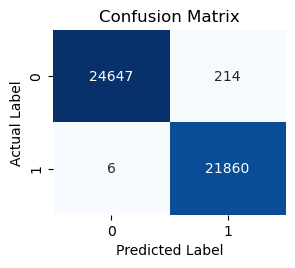

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Đọc file testsaucomplete.csv
df = pd.read_csv('testsaucomplete.csv')

# Lấy giá trị từ cột real_label và predict_label
real_labels = df['real_label']
predict_labels = df['predict_label']

# Tính toán confusion matrix
cm = confusion_matrix(real_labels, predict_labels)

accuracy = accuracy_score(real_labels, predict_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Vẽ confusion matrix
plt.figure(figsize=(3, 2.4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
import re
import pandas as pd

# Bước 1: Đọc file outputcommandsau.txt và xử lý các giá trị
output_file = 'outputcommandtruoc.txt'
unique_values = set()

# Mở và đọc file
with open(output_file, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Duyệt qua từng dòng để kiểm tra định dạng và lưu giá trị vào mảng
for line in lines:
    line = line.strip()

    # Kiểm tra định dạng (404, 360)
    match_404_360 = re.match(r'\((\d+), (\d+)\)', line)
    if match_404_360:
        unique_values.add(f"{match_404_360.group(1)} {match_404_360.group(2)}")
        continue

    # Kiểm tra định dạng {'/model/model/fm/request/request': '/nmaplowercheck1642996621'}
    match_dict = re.search(r"\'[^\']*\':\s*\'([^\']*)\'", line)
    if match_dict:
        unique_values.add(f" {match_dict.group(1)} ")
        continue

    # Kiểm tra định dạng (2886960046, b'Mozilla/5.0...')
    match_mozilla = re.match(r'\((\d+),\s*b\'([^\']*)\'\)', line)
    if match_mozilla:
        unique_values.add(f" {match_mozilla.group(2)} ")
        unique_values.add(f" {match_mozilla.group(1)} ")
        continue

    # Kiểm tra định dạng (b'-', b'/nmaplowercheck1642996621')
    match_nmaplower = re.match(r'\(b\'-\',\s*b\'([^\']*)\'\)', line)
    if match_nmaplower:
        unique_values.add(f" {match_nmaplower.group(1)} ")

# Chuyển tập hợp thành danh sách để không có giá trị trùng lặp
unique_values_list = list(unique_values)

# print("Mảng các giá trị trích xuất từ file outputcommandtruoc.txt:")
# print(unique_values_list)
# # Ghi mảng unique_values_list vào file text, mỗi giá trị một dòng
# with open('extracted_values.txt', 'w', encoding='utf-8') as file:
#     for value in unique_values_list:
#         file.write(value + '\n')

# Bước 2: Đọc file test_datasau.csv và xử lý
test_data_file = 'test_datatruoc.csv'
df = pd.read_csv(test_data_file)

# Tạo cột predict_label với giá trị mặc định là 0
df['predict_label'] = 0

# Bước 3: Kiểm tra từng dòng trong file outputcommandsau.txt và cột 'data'
for index, row in df.iterrows():
    data_value = row['data']
    
    # Kiểm tra xem giá trị nào trong unique_values_list có trong data_value
    if any(val in data_value for val in unique_values_list):
        df.at[index, 'predict_label'] = 1
    else:
        # Kiểm tra ngược lại: Nếu cột 'data' có trong bất kỳ dòng nào trong outputcommandsau.txt
        if any(data_value in line for line in lines):
            df.at[index, 'predict_label'] = 1

# Bước 4: Xuất file testsaucomplete.csv với cột data, real_label, và predict_label
output_csv_file = 'testtruoccomplete.csv'
df.to_csv(output_csv_file, index=False)

Accuracy: 53.21%


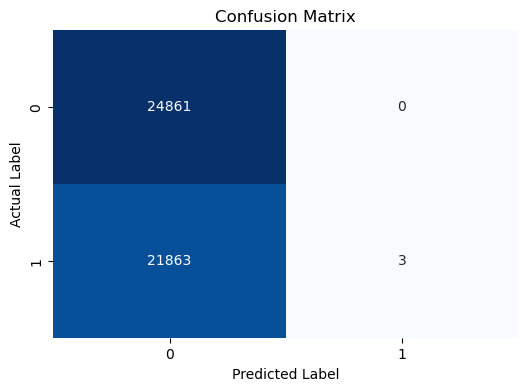

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Đọc file testsaucomplete.csv
df = pd.read_csv('testtruoccomplete.csv')

# Lấy giá trị từ cột real_label và predict_label
real_labels = df['real_label']
predict_labels = df['predict_label']

# Tính toán confusion matrix
cm = confusion_matrix(real_labels, predict_labels)

accuracy = accuracy_score(real_labels, predict_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Vẽ confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()